In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
data <- read.csv("table3.csv", header = T)
head(data)

,ID,Treatment,Cal_cum,LV_TAG,lipidosis_area_pct,Fat_mass,subq_wt,epi_wat,mesenteric_wt,plasma_TAG
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,LFD,1425.870,367.77,17.596,11.152,0.40,1.80,0.33,38.547
2,2,LFD,1241.231,400.53,0.696,7.357,0.72,1.34,0.48,53.408
3,3,LFD,1298.180,379.47,17.311,10.517,0.89,2.08,0.94,68.087
4,4,LFD,1812.026,332.67,16.353,12.781,0.78,2.13,0.54,37.492
5,5,LFD,1373.638,408.33,5.164,6.385,0.26,0.97,0.32,46.053
6,6,LFD,1448.174,454.35,22.362,11.460,0.99,2.07,0.60,45.932


In [32]:
correlate <- data %>%
group_by(Treatment) %>%
summarise(r = cor(lipidosis_area_pct, Cal_cum, method = "spearman"), 
          pvalue = cor.test(lipidosis_area_pct, Cal_cum)$p.value)

In [33]:
correlate

Treatment,r,pvalue
<fct>,<dbl>,<dbl>
HFD,0.41258741,0.05479645
HFD+HXN,-0.01398601,0.70381359
HFD+LXN,0.37062937,0.30194969
HFD+TXN,-0.06363636,0.82494431
LFD,0.48951049,0.03479538


In [34]:
correlate2 <- data %>%
group_by(Treatment) %>%
summarise(r = cor(LV_TAG, Cal_cum, method = "spearman"), 
          pvalue = cor.test(LV_TAG, Cal_cum)$p.value)

In [35]:
correlate2

Treatment,r,pvalue
<fct>,<dbl>,<dbl>
HFD,0.01398601,0.87994473
HFD+HXN,0.50349650,0.11307587
HFD+LXN,0.13286713,0.72669757
HFD+TXN,0.76363636,0.01320455
LFD,0.28671329,0.97284993


In [50]:
relation <- lm(data$lipidosis_area_pct ~ data$Cal_cum)
df <- summary(relation)

### Correlation between steatosis score and total caloric intake

In [144]:
df <- data %>%
    group_by(Treatment) %>%
    do(steatosis_mod = lm(lipidosis_area_pct ~ Cal_cum, data = .)) %>%
    mutate(coefficient = summary(steatosis_mod)$coefficients[2],
             r.squared = summary(steatosis_mod)$r.squared,
         adj.r.squared = summary(steatosis_mod)$adj.r.squared,
               p.value = summary(steatosis_mod)$coefficients[2,4],
                CI.2.5 = confint(steatosis_mod, level = 0.95)[1,1],
               CI.97.5 = confint(steatosis_mod, level = 0.95)[1,2])
df[-2]

Treatment,coefficient,r.squared,adj.r.squared,p.value,CI.2.5,CI.97.5
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFD,0.038992289,0.320945840,0.25304042,0.05479645,-123.56199,18.111761
HFD+HXN,0.010690598,0.015077469,-0.08341478,0.70381359,-105.75487,91.290411
HFD+LXN,0.017305479,0.105916217,0.01650784,0.30194969,-79.72169,45.631252
HFD+TXN,0.002061449,0.005729394,-0.10474512,0.82494431,-31.85212,38.942860
LFD,0.031012601,0.373354699,0.31069017,0.03479538,-73.88981,8.702456


### Correlation between liver TAG and total caloric intake

In [145]:
df2 <- data %>%
    group_by(Treatment) %>%
    do(lvTAG_mod = lm(LV_TAG ~ Cal_cum, data = .)) %>%
    mutate(coefficient = summary(lvTAG_mod)$coefficients[2],
             r.squared = summary(lvTAG_mod)$r.squared,
         adj.r.squared = summary(lvTAG_mod)$adj.r.squared,
               p.value = summary(lvTAG_mod)$coefficients[2,4],
                CI.2.5 = confint(lvTAG_mod, level = 0.95)[1,1],
               CI.97.5 = confint(lvTAG_mod, level = 0.95)[1,2])
df2[-2]

Treatment,coefficient,r.squared,adj.r.squared,p.value,CI.2.5,CI.97.5
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFD,-0.116226746,0.0023951548,-0.09736533,0.87994473,-2104.5370,3820.5250
HFD+HXN,0.772553511,0.2317333004,0.15490663,0.11307587,-2266.3321,941.5440
HFD+LXN,0.080865205,0.0127590363,-0.08596506,0.72669757,-445.1026,1328.3001
HFD+TXN,0.281986565,0.5126630187,0.45851447,0.01320455,-398.0912,318.6447
LFD,-0.006263476,0.0001217535,-0.09986607,0.97284993,-133.4989,1033.3088


### Correlation between total fat mass (by dexa scan) and total caloric intake

In [162]:
df6 <- data %>%
    group_by(Treatment) %>%
    do(Fat_mass_mod = lm(Fat_mass ~ Cal_cum, data = .)) %>%
    mutate(coefficient = summary(Fat_mass_mod)$coefficients[2],
             r.squared = summary(Fat_mass_mod)$r.squared,
         adj.r.squared = summary(Fat_mass_mod)$adj.r.squared,
               p.value = summary(Fat_mass_mod)$coefficients[2,4],
                CI.2.5 = confint(Fat_mass_mod, level = 0.95)[1,1],
               CI.97.5 = confint(Fat_mass_mod, level = 0.95)[1,2])
df6[-2]

Treatment,coefficient,r.squared,adj.r.squared,p.value,CI.2.5,CI.97.5
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFD,-0.006027265,0.15470976,0.07018074,0.205891479,12.947241,48.13882
HFD+HXN,0.002373123,0.00699553,-0.09230492,0.796076756,-18.178295,46.29988
HFD+LXN,0.004430467,0.04902178,-0.04607604,0.489206435,-12.875652,35.77439
HFD+TXN,-0.001944626,0.01681289,-0.09243012,0.703961099,-1.692424,37.07483
LFD,0.009689779,0.61924972,0.58117469,0.002388507,-11.430253,4.18871


### Correlation between epididymal fat mass (by scale) and total caloric intake

In [163]:
df3 <- data %>%
    group_by(Treatment) %>%
    do(epi_mod = lm(epi_wat ~ Cal_cum, data = .)) %>%
    mutate(coefficient = summary(epi_mod)$coefficients[2],
             r.squared = summary(epi_mod)$r.squared,
         adj.r.squared = summary(epi_mod)$adj.r.squared,
               p.value = summary(epi_mod)$coefficients[2,4],
                CI.2.5 = confint(epi_mod, level = 0.95)[1,1],
               CI.97.5 = confint(epi_mod, level = 0.95)[1,2])
df3[-2]

Treatment,coefficient,r.squared,adj.r.squared,p.value,CI.2.5,CI.97.5
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFD,-0.001864942,0.06149477,-0.03235575,0.437081674,-3.568510,14.630125
HFD+HXN,-0.003185989,0.27514795,0.20266275,0.079971847,2.075435,13.868130
HFD+LXN,-0.001939055,0.33528541,0.26881395,0.048516391,2.321221,9.128030
HFD+TXN,-0.001539081,0.57324420,0.52582689,0.006971722,3.516606,6.978496
LFD,0.001339460,0.34846508,0.28331159,0.043311192,-2.059887,1.705158


### Correlation between mesenteric fat mass (by scale) and total caloric intake

In [164]:
df4 <- data %>%
    group_by(Treatment) %>%
    do(mesenteric_mod = lm(mesenteric_wt ~ Cal_cum, data = .)) %>%
    mutate(coefficient = summary(mesenteric_mod)$coefficients[2],
             r.squared = summary(mesenteric_mod)$r.squared,
         adj.r.squared = summary(mesenteric_mod)$adj.r.squared,
               p.value = summary(mesenteric_mod)$coefficients[2,4],
                CI.2.5 = confint(mesenteric_mod, level = 0.95)[1,1],
               CI.97.5 = confint(mesenteric_mod, level = 0.95)[1,2])
df4[-2]

Treatment,coefficient,r.squared,adj.r.squared,p.value,CI.2.5,CI.97.5
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFD,-2.358721e-04,6.767857e-03,-0.092555358,0.7993619,-1.7336006,5.403974
HFD+HXN,1.726105e-03,9.720151e-02,0.006921659,0.3238830,-7.6501313,4.346338
HFD+LXN,1.223506e-05,2.376469e-05,-0.099973859,0.9880035,-1.9126870,4.344480
HFD+TXN,-9.021581e-05,2.328762e-03,-0.108523598,0.8879517,-1.5647174,3.303230
LFD,1.176511e-04,1.425328e-02,-0.084321391,0.7117082,-0.6719339,1.339346


### Correlation between subQ fat mass (by scale) and total caloric intake

In [165]:
df5 <- data %>%
    group_by(Treatment) %>%
    do(subq_mod = lm(subq_wt ~ Cal_cum, data = .)) %>%
    mutate(coefficient = summary(subq_mod)$coefficients[2],
             r.squared = summary(subq_mod)$r.squared,
         adj.r.squared = summary(subq_mod)$adj.r.squared,
               p.value = summary(subq_mod)$coefficients[2,4],
                CI.2.5 = confint(subq_mod, level = 0.95)[1,1],
               CI.97.5 = confint(subq_mod, level = 0.95)[1,2])
df5[-2]

Treatment,coefficient,r.squared,adj.r.squared,p.value,CI.2.5,CI.97.5
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFD,-0.0002678418,0.002955728,-0.09674870,0.8667331,-3.4738183,8.814084
HFD+HXN,0.0008441713,0.030113609,-0.06687503,0.5896355,-5.0889540,5.836434
HFD+LXN,0.0020398611,0.304832914,0.23531621,0.0627014,-5.4350837,2.244847
HFD+TXN,-0.0010042506,0.158114942,0.06457216,0.2258691,-0.1819838,5.859089
LFD,0.0003427162,0.074511571,-0.01803727,0.3906619,-1.0213335,1.461567


### Correlation between plasma TAG and total caloric intake

In [166]:
df7 <- data %>%
    group_by(Treatment) %>%
    do(plasma_TAG_mod = lm(plasma_TAG ~ Cal_cum, data = .)) %>%
    mutate(coefficient = summary(plasma_TAG_mod)$coefficients[2],
             r.squared = summary(plasma_TAG_mod)$r.squared,
         adj.r.squared = summary(plasma_TAG_mod)$adj.r.squared,
               p.value = summary(plasma_TAG_mod)$coefficients[2,4],
                CI.2.5 = confint(plasma_TAG_mod, level = 0.95)[1,1],
               CI.97.5 = confint(plasma_TAG_mod, level = 0.95)[1,2])
df7[-2]

Treatment,coefficient,r.squared,adj.r.squared,p.value,CI.2.5,CI.97.5
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFD,0.02271031,0.05581253,-0.03860622,0.45976040,-109.76018,123.5645
HFD+HXN,-0.01606718,0.01464724,-0.08388803,0.70790360,-73.79761,226.7303
HFD+LXN,-0.03357288,0.24753420,0.17228762,0.09979209,34.71910,180.6534
HFD+TXN,-0.02444727,0.29552978,0.21725531,0.08389369,50.55266,148.9522
LFD,-0.02277021,0.23068387,0.15375226,0.11401399,37.24356,122.7230


In [97]:
data %>%
group_by(Treatment) %>%
summarise(coefficient = summary(lm(lipidosis_area_pct ~ Cal_cum))$coefficients[2,1],
          r.squared = summary(lm(lipidosis_area_pct ~ Cal_cum))$r.squared,
          adj.r.squared = summary(lm(lipidosis_area_pct ~ Cal_cum))$adj.r.squared,
         p.value = summary(lm(lipidosis_area_pct ~ Cal_cum))$coefficients[2,4],
         CI.2.5 = confint(lm(lipidosis_area_pct ~ Cal_cum), level = 0.95)[1,1],
         CI.97.5 = confint(lm(lipidosis_area_pct ~ Cal_cum), level = 0.95)[1,2])

Treatment,coefficient,r.squared,adj.r.squared,p.value,CI.2.5,CI.97.5
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFD,0.038992289,0.320945840,0.25304042,0.05479645,-123.56199,18.111761
HFD+HXN,0.010690598,0.015077469,-0.08341478,0.70381359,-105.75487,91.290411
HFD+LXN,0.017305479,0.105916217,0.01650784,0.30194969,-79.72169,45.631252
HFD+TXN,0.002061449,0.005729394,-0.10474512,0.82494431,-31.85212,38.942860
LFD,0.031012601,0.373354699,0.31069017,0.03479538,-73.88981,8.702456


In [98]:
data %>%
group_by(Treatment) %>%
summarise(coefficient = summary(lm(LV_TAG ~ Cal_cum))$coefficients[2,1],
          r.squared = summary(lm(LV_TAG ~ Cal_cum))$r.squared,
          adj.r.squared = summary(lm(LV_TAG ~ Cal_cum))$adj.r.squared,
         p.value = summary(lm(LV_TAG ~ Cal_cum))$coefficients[2,4],
         CI.2.5 = confint(lm(LV_TAG ~ Cal_cum), level = 0.95)[1,1],
         CI.97.5 = confint(lm(LV_TAG ~ Cal_cum), level = 0.95)[1,2])

Treatment,coefficient,r.squared,adj.r.squared,p.value,CI.2.5,CI.97.5
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFD,-0.116226746,0.0023951548,-0.09736533,0.87994473,-2104.5370,3820.5250
HFD+HXN,0.772553511,0.2317333004,0.15490663,0.11307587,-2266.3321,941.5440
HFD+LXN,0.080865205,0.0127590363,-0.08596506,0.72669757,-445.1026,1328.3001
HFD+TXN,0.281986565,0.5126630187,0.45851447,0.01320455,-398.0912,318.6447
LFD,-0.006263476,0.0001217535,-0.09986607,0.97284993,-133.4989,1033.3088


In [148]:
hfd <- data %>% filter(Treatment == "HFD")

In [160]:
lfd <- data %>% filter(Treatment == "LFD")

In [150]:
txn <- data %>% filter(Treatment == "HFD+TXN")

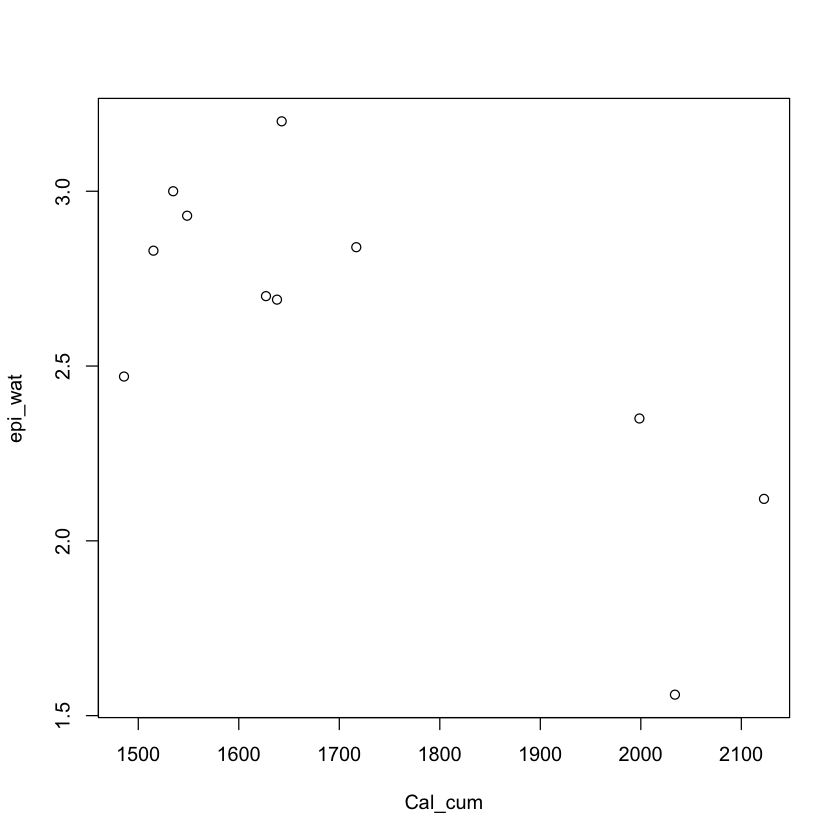

In [151]:
plot(epi_wat ~ Cal_cum, data = txn)

`geom_smooth()` using formula 'y ~ x'



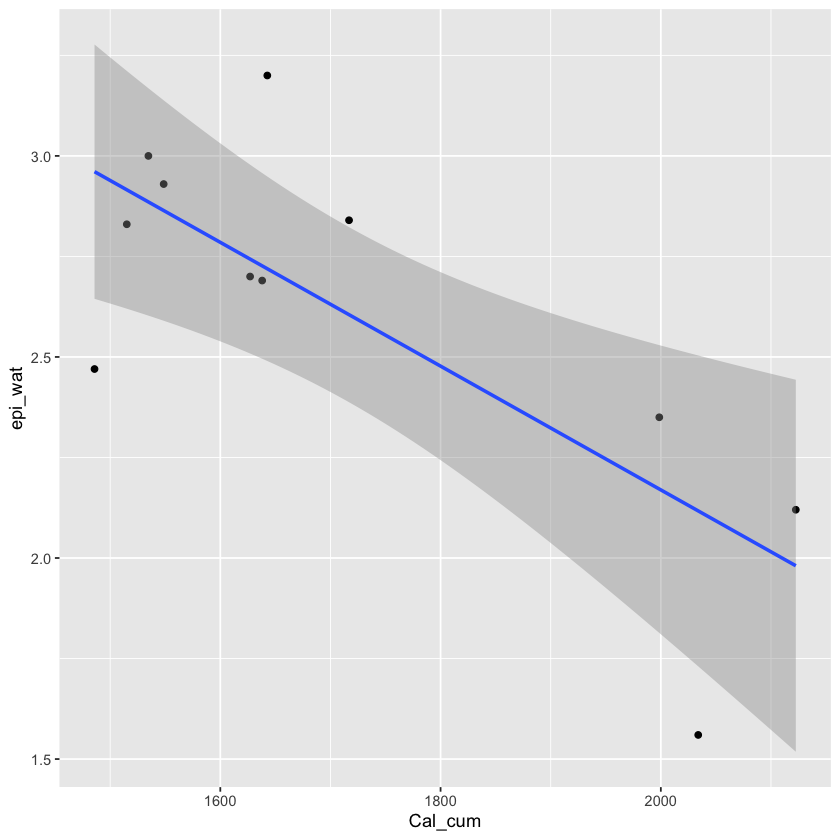

In [153]:
ggplot(txn, aes(x=Cal_cum, y=epi_wat)) +
geom_point() +
stat_smooth(method = 'lm')

In [173]:
ggplotRegression <- function (fit) {

require(ggplot2)

ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 4)))
}

#https://sejohnston.com/2012/08/09/a-quick-and-easy-function-to-plot-lm-results-in-r/

`geom_smooth()` using formula 'y ~ x'



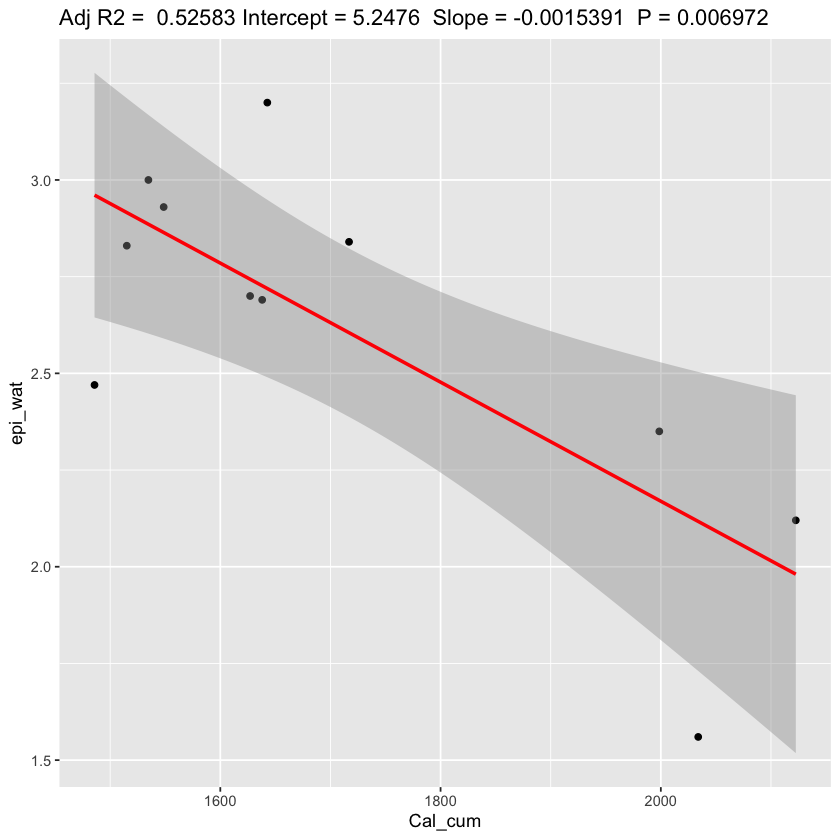

In [172]:
ggplotRegression(lm(epi_wat ~ Cal_cum, data = txn))

`geom_smooth()` using formula 'y ~ x'



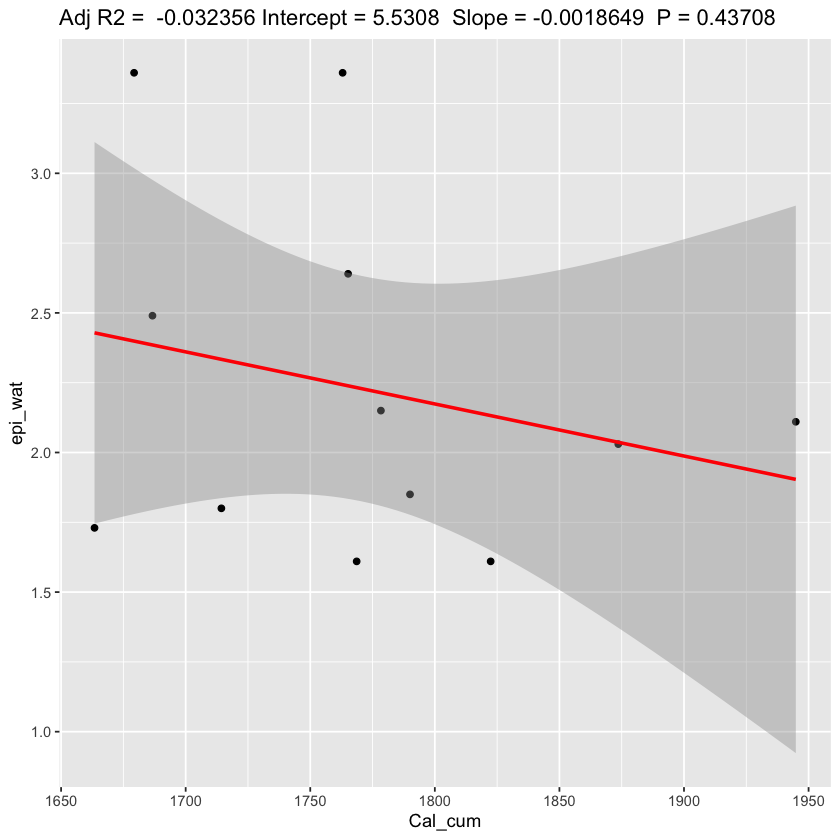

In [170]:
ggplotRegression(lm(epi_wat ~ Cal_cum, data = hfd))

`geom_smooth()` using formula 'y ~ x'



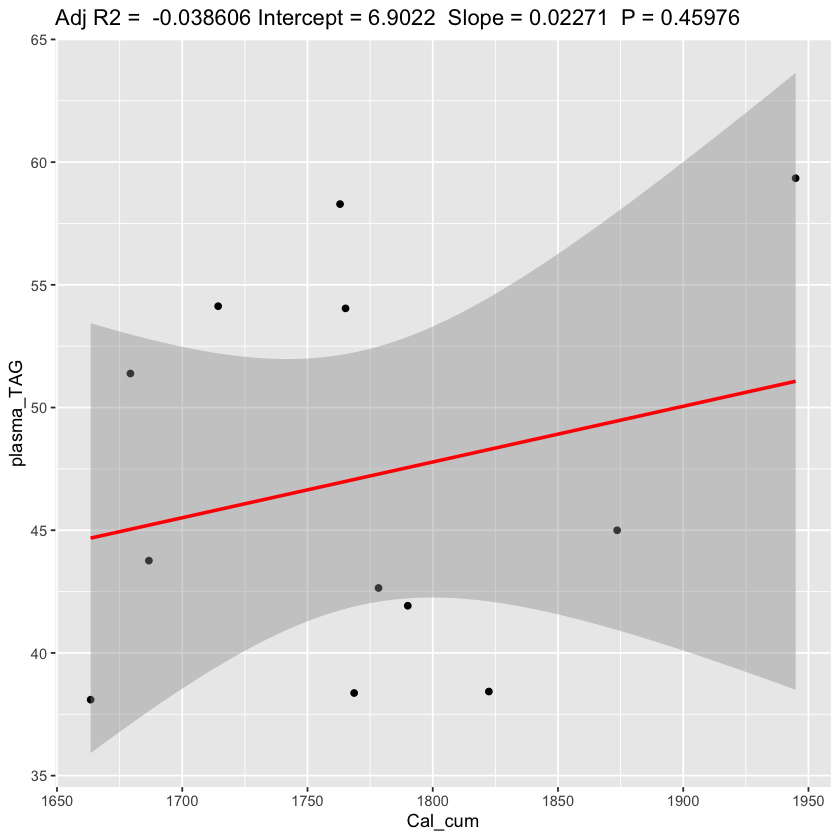

In [168]:
ggplotRegression(lm(plasma_TAG ~ Cal_cum, data = hfd))

`geom_smooth()` using formula 'y ~ x'



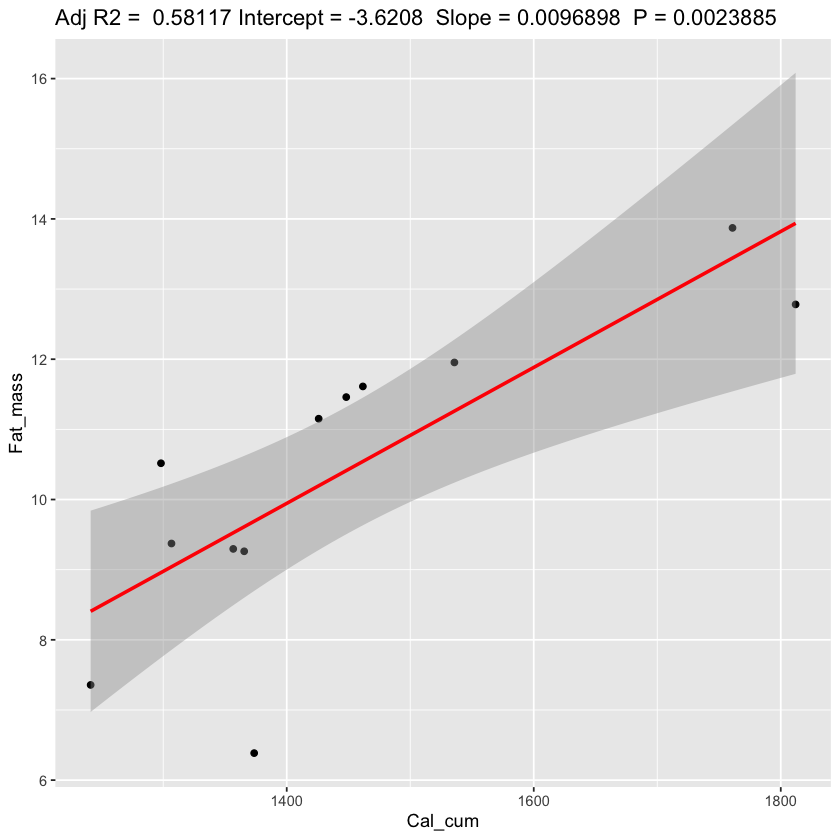

In [161]:
ggplotRegression(lm(Fat_mass ~ Cal_cum, data = lfd))